In [ ]:
from helpers.helpers import basic_stats_cat, cat_plot
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Basic plot configuration
plt.rcParams['legend.title_fontsize'] = 'x-large'
plt.rcParams['legend.fontsize'] = 'x-large'
plt.rcParams['figure.figsize'] = (20,15)
sns.set_theme(style="whitegrid")

In [ ]:
# Load the Ames dataset
# Dataset description : https://www.kaggle.com/c/house-prices-advanced-regression-techniques
ames = pd.read_csv('../input/ames_unprocessed_data.csv', sep=',')

# Print number of features
print(f"Number of features: {ames.shape[1]}")

# Print number of categorical features
cat_features = list(ames.select_dtypes(include='object').columns)
print(f"Number of categorical features: {len(cat_features)}")
print(cat_features)

# Print number of numerical features
num_features = list(ames.select_dtypes(exclude='object').columns)
print(f"Number of categorical features: {len(num_features)}")
print(num_features)

### EDA (Numerical Features)

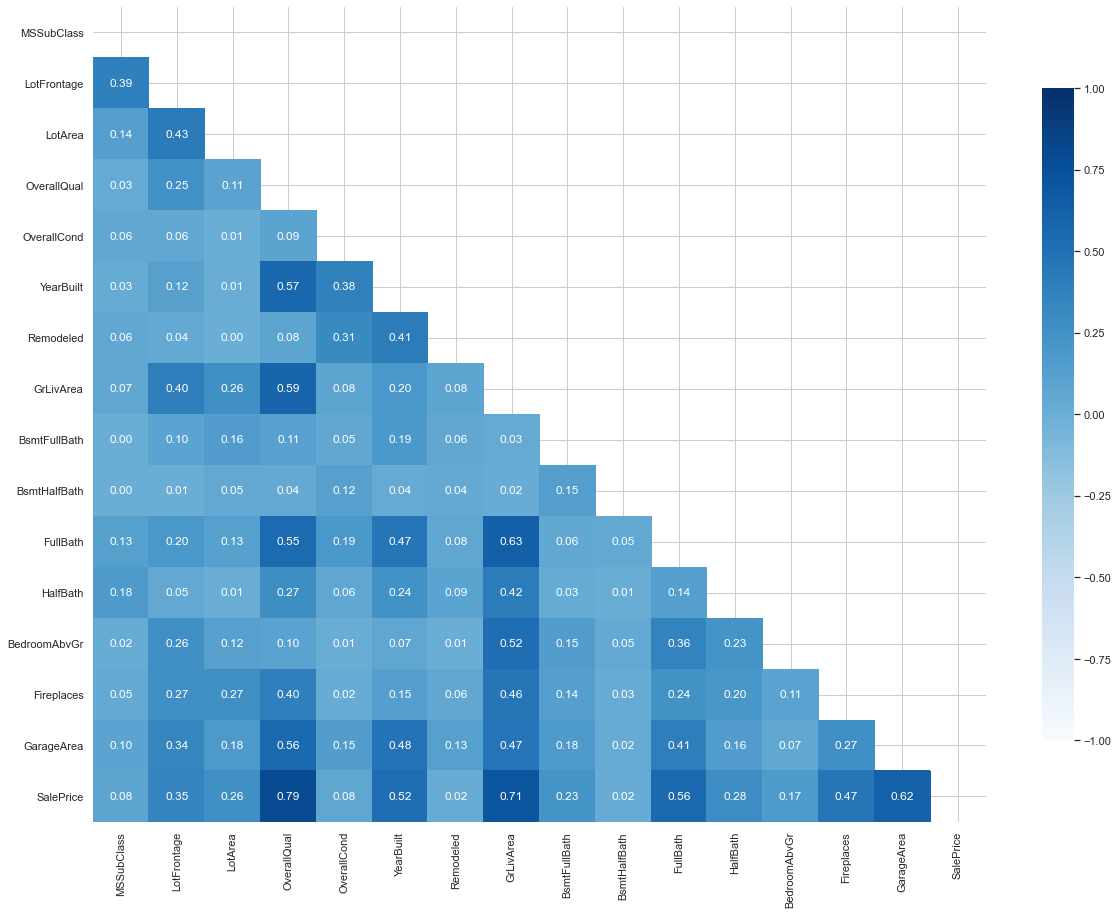

In [3]:
# Correlation Matrix
df_corr = ames.corr().abs()

# mask
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
# plot heatmap
sns.heatmap(df_corr, mask=mask, annot=True, fmt=".2f", cmap='Blues',
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})
# yticks
plt.yticks(rotation=0)
plt.grid()
plt.show()

In [12]:
# Select all the features with high correlation (>0.95):
tri_df = df_corr.mask(mask)
features_whc = [c for c in tri_df.columns if any(tri_df[c]>0.95)]
print(f"Number of features highly correlated: {len(features_whc)}")

Number of features highly correlated: 0


In [13]:
# Select all the features that are highly correlated with the target "SalePrice":
features_correlated_target = [c for c in tri_df.columns if tri_df.loc['SalePrice',c]>0.6]
print(f"Number of features highly correlated with the target (SalePrice): {len(features_correlated_target)}")
print(features_correlated_target)

Number of features highly correlated with the target (SalePrice): 3
['OverallQual', 'GrLivArea', 'GarageArea']


Text(0.5, 1.0, 'SalePrice vs GrLivArea')

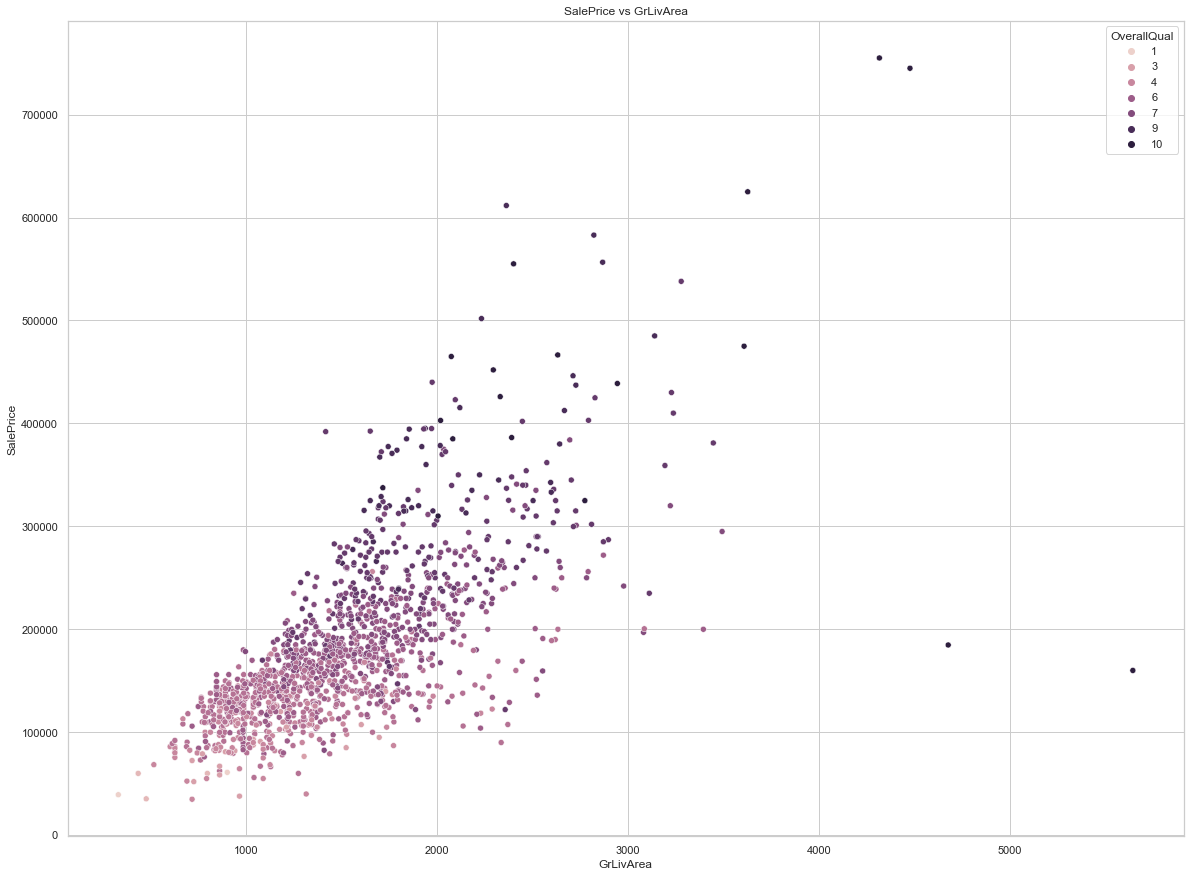

In [14]:
# Scatter plot target vs GrLivArea
sns.scatterplot(x='GrLivArea', y='SalePrice', hue='OverallQual', data=ames)
plt.title('SalePrice vs GrLivArea')

Text(0.5, 1.0, 'SalePrice vs OverallQual')

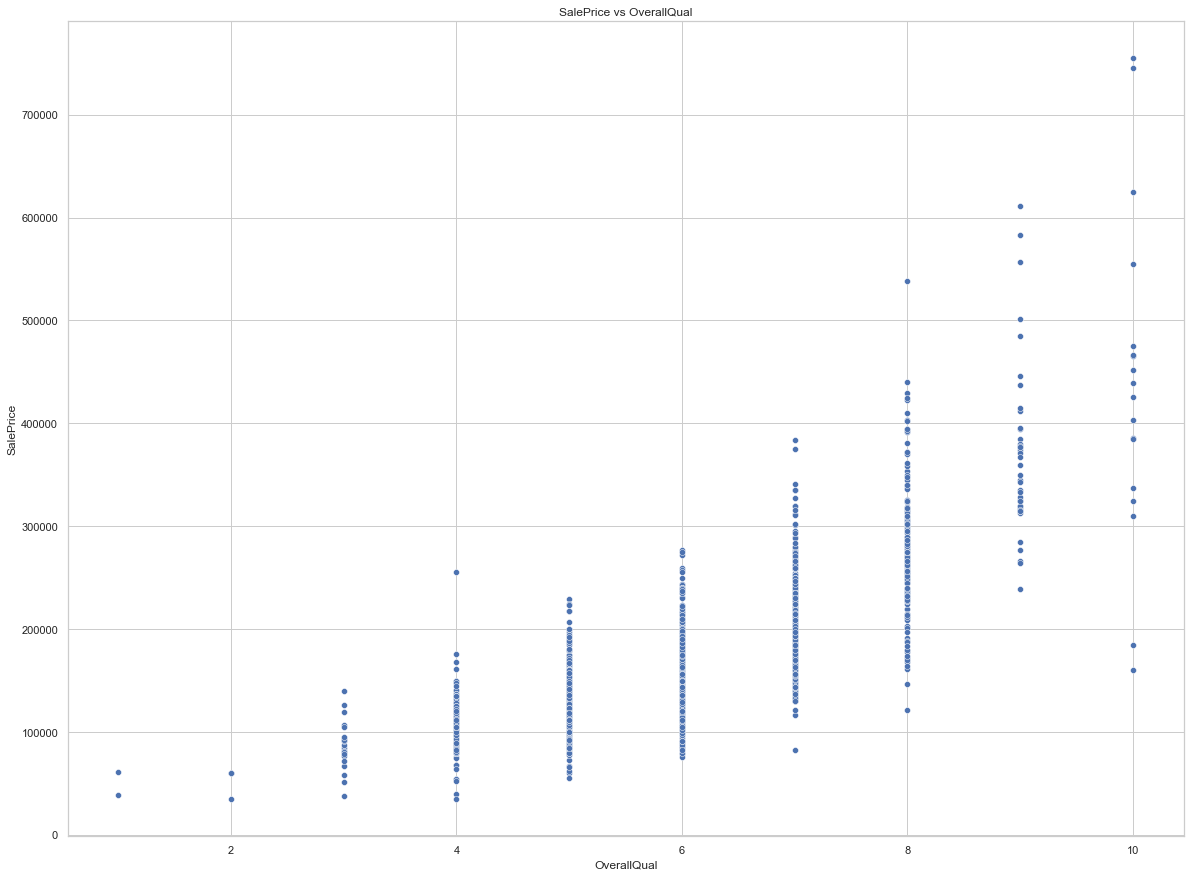

In [15]:
# Scatter plot target vs GrLivArea
sns.scatterplot(x='OverallQual', y='SalePrice', data=ames)
plt.title('SalePrice vs OverallQual')

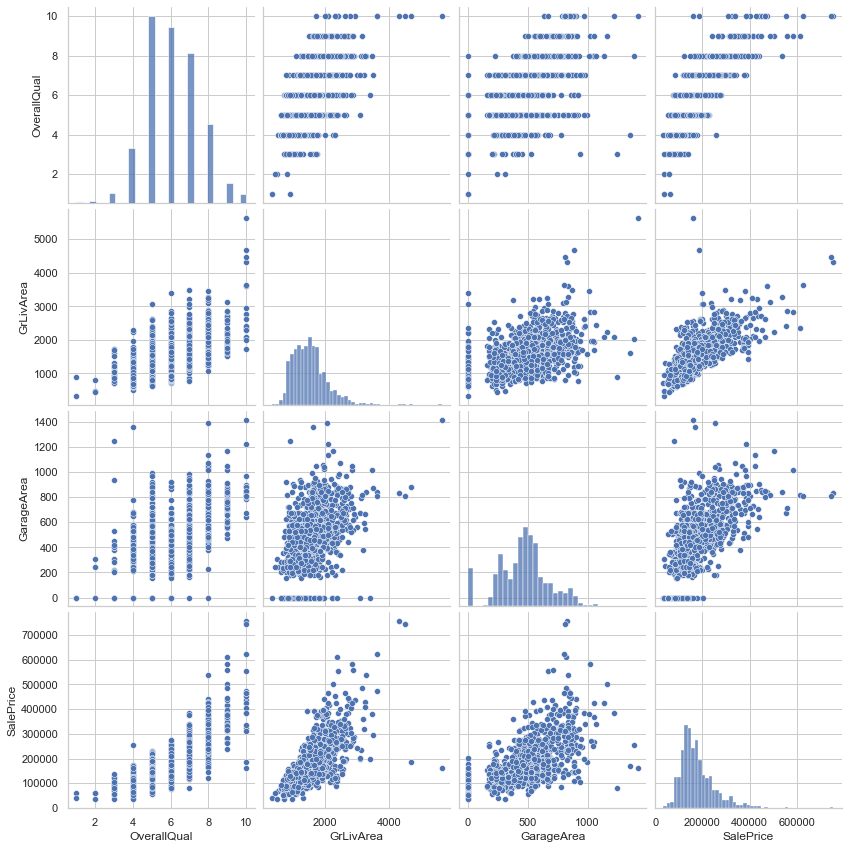

In [18]:
# Pairplot
sns.pairplot(ames[features_correlated_target], height=3.0)

We can clearly see that the target is highly correlated with the ***OverallQual***, ***GrLivArea*** and the ***GarageArea***.

### EDA (Categorical Features)

In [4]:
# Basic stats on the categorical features:
basic_stats_cat(ames)

AttributeError: 'DataFrame' object has no attribute 'unique'

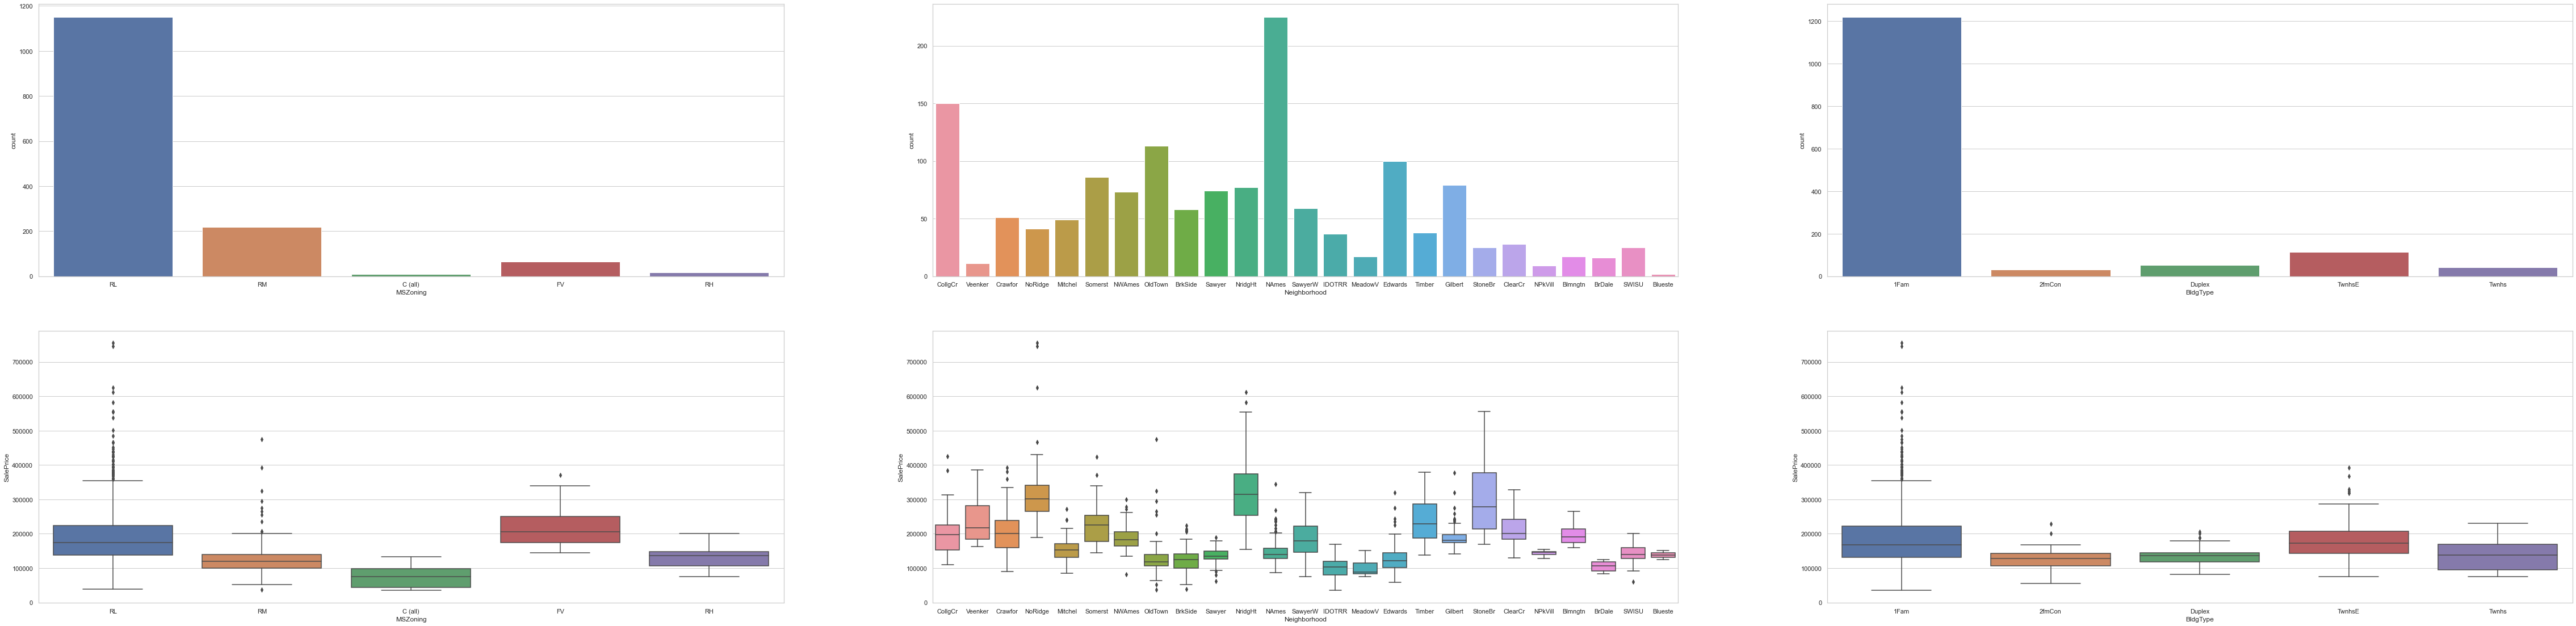

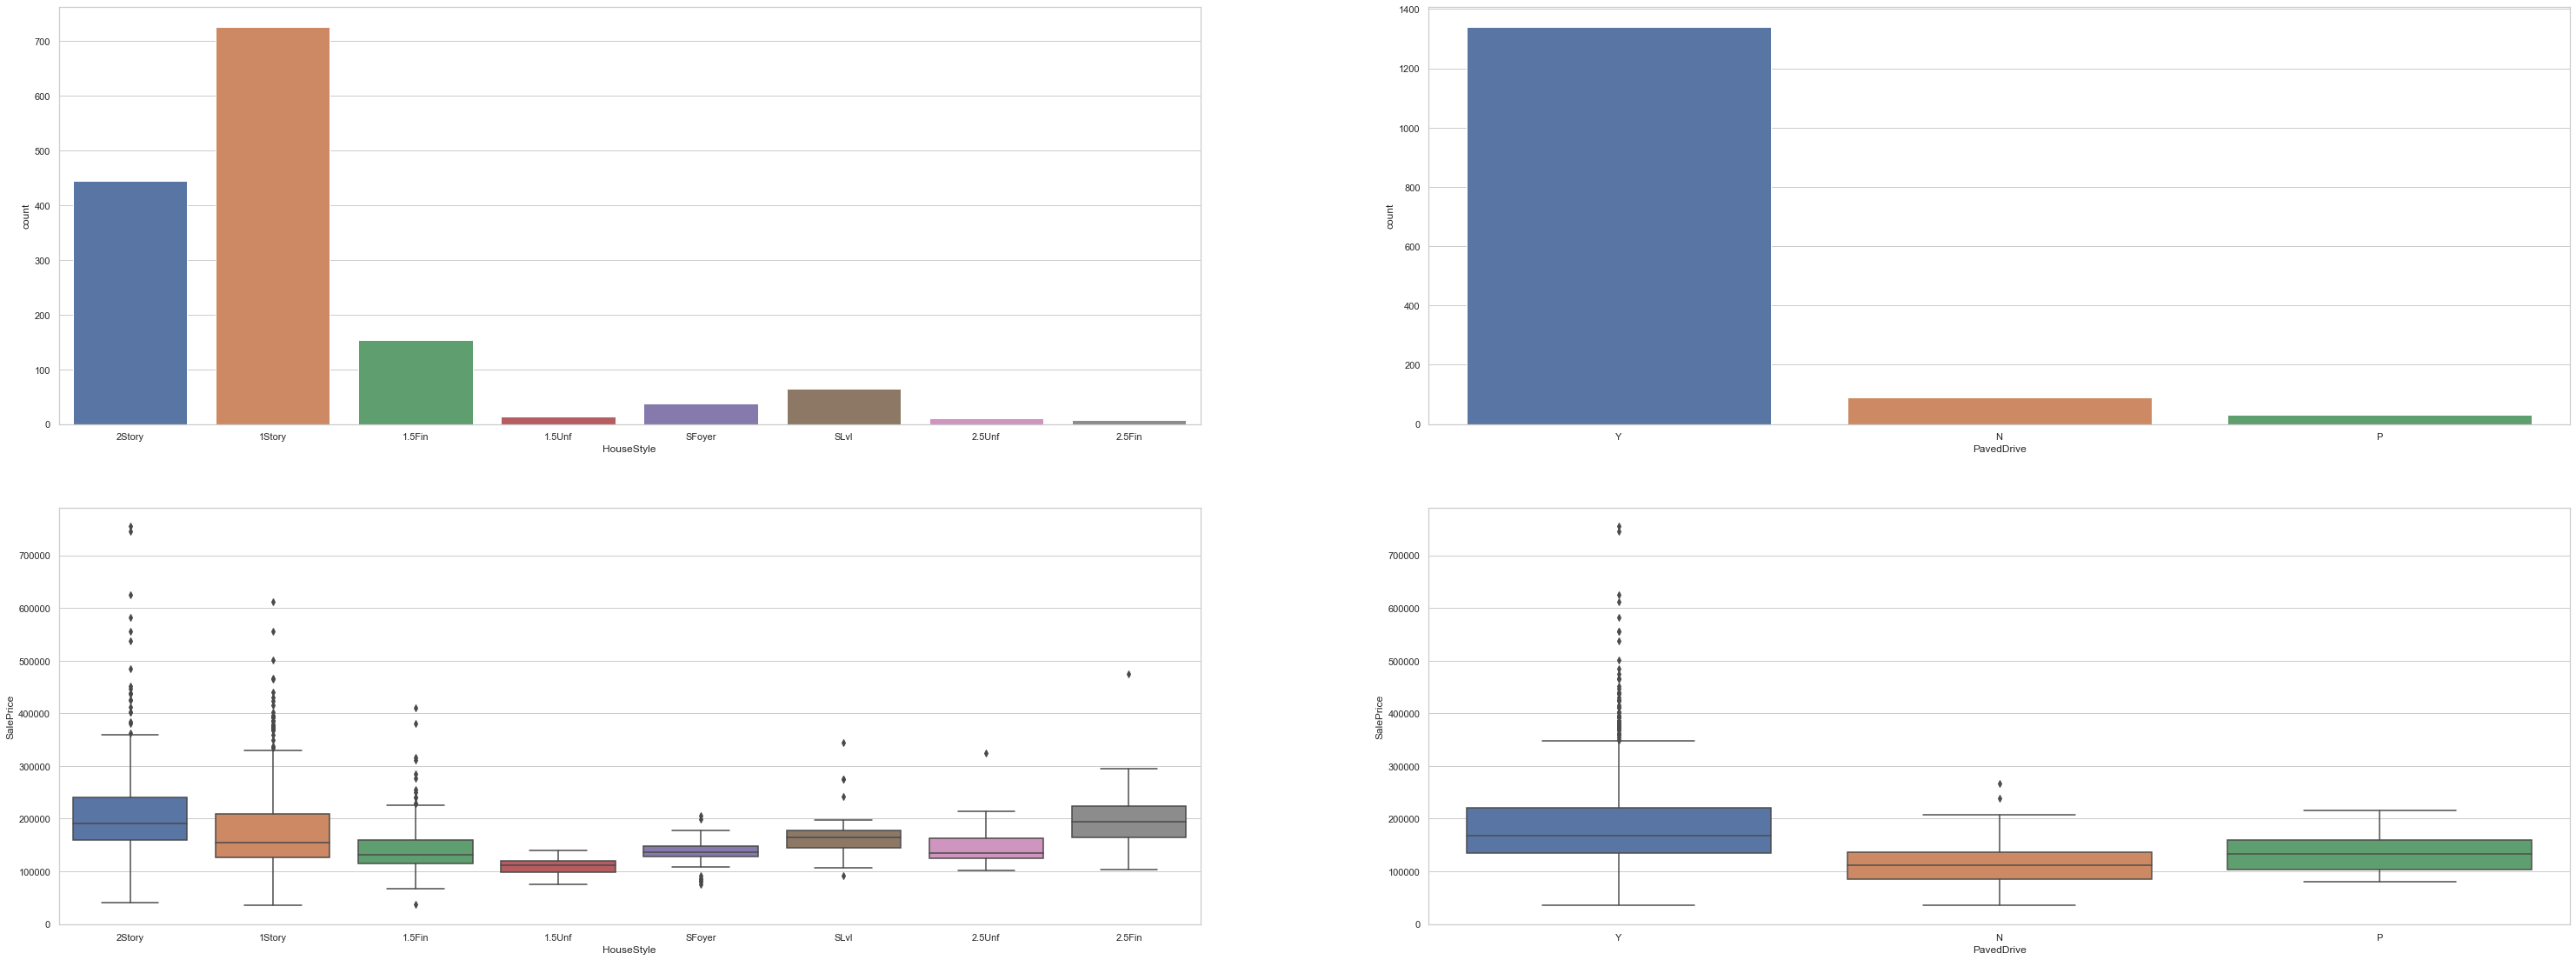

In [3]:
cat_plot(ames, 'SalePrice')